# Project 4/5 - FreeCodeCamp

In this project we are going to practice using timeseries to see the evolution of visits to the __[FreeCodeCamp](https://forum.freecodecamp.org/)__ forum between two specific dates.

## 1. Import and read

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

%matplotlib inline

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = [0])

Let's have a quick look at our dataframe:

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


As we can see, the `date` column is already a datetime (due to parsing it as such in the `read_csv`). Now, it is usually the case that the dates make the index when studying timeseries. Therefore, we'll use the pandas method `set_index` to achieve this.

In [5]:
#df.set_index('date', inplace=True)
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


Now we can already have a look at the values in the dataframe using a quick plot.

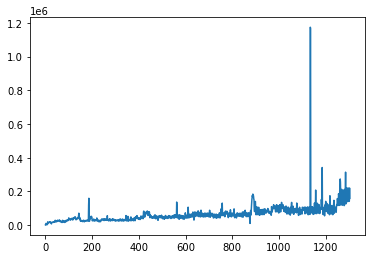

In [6]:
df['value'].plot()

In [7]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


## 2. Cleaning the data

We are interested in most of the data, but we'll consider unnecessary those days that are below the 2.5th percentile and above 97.5th.

In [8]:
df_clean = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df_clean

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [9]:
(df.shape[0]-df_clean.shape[0])*100/df.shape[0]

5.061349693251533

We got rid of 5% of the original dataframe (as expected, since 5% is the diference in between the 2.5th and 97.5th percentiles).

## 3. Plotting the page views

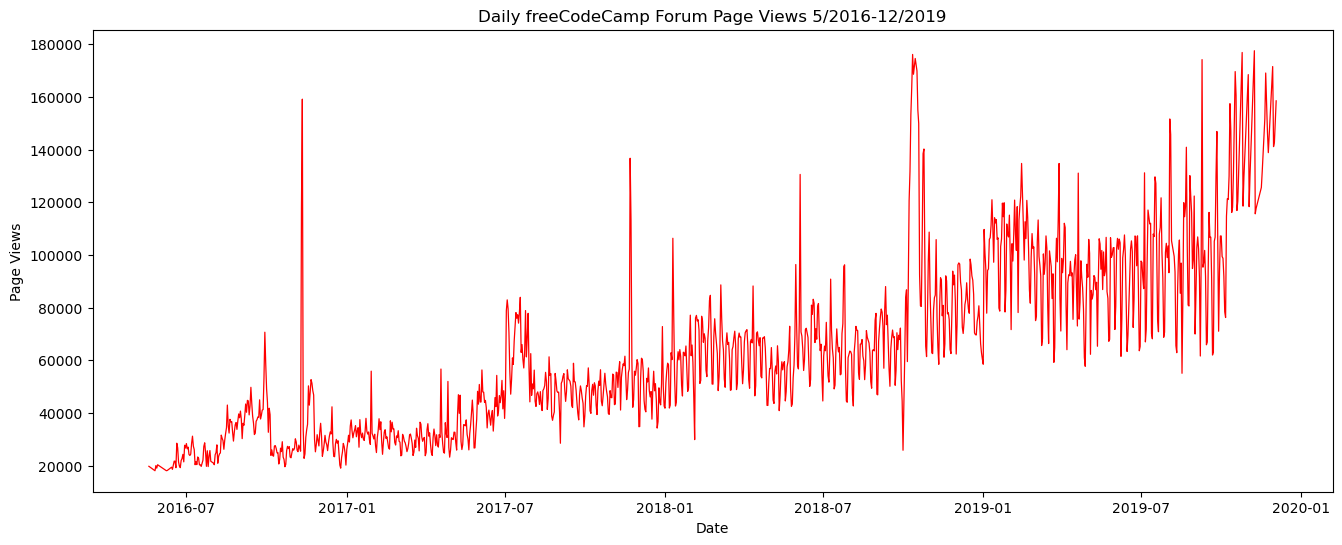

In [31]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.style.use('default')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.plot(df_clean['date'], df_clean['value'], c='red', linewidth=.9)

## 4. Plotting the monthly average user visits

Let's begin by turning the column `date` into our dataframe's index, since we don't really need it anymore as a column.

In [47]:
df_clean.set_index('date', inplace=True)
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


`date` being of the type datetime, it has the properties `year` and `month`, that return those values from the datetime. If we want to plot the average visits to the FCC Forum every year, we would need a table where we have first:
- each year
- months in every year
- average of that month

That is, we want to group our dataframe into years and months, and calculate the `mean()`

In [52]:
df_grouped = df_clean.groupby([df_clean.index.year, df_clean.index.month]).mean()
df_grouped

value
date date               
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667
     10     27398.322581
     11     40448.633333
     12     27832.419355
2017 1      32785.161290
     2      31113.071429
     3      29369.096774
     4      30878.733333
     5      34244.290323
     6      43577.500000
     7      65806.838710
     8      47712.451613
     9      47376.800000
     10     47438.709677
     11     57701.566667
     12     48420.580645
2018 1      58580.096774
     2      65679.000000
     3      62693.774194
     4      62350.833333
     5      56562.870968
     6      70117.000000
     7      63591.064516
     8      62831.612903
     9      65941.733333
     10    111378.142857
     11     78688.333333
     12     80047.483871
2019 1     102056.516129
     2     105968.357143
     3      91214.483871
     4      89368.433333
     5      91439.903226
     6      90435.642857
     7      97236.566667
     8     102717.310345
     9      97268.833333
     10    122802.272727
     11    143166.428571
     12    150733.500000

Now, this doesn't give us the plot that we wanted. I have to admit I was a bit at a loss at this point, since I didn't know the function `unstack()`. What unstack does in here is to take one of the indexes (the years, in this case level=0; or the months, level=1) and pivots it as columns. In our case, we want the years on the x axis, so every column should be a month. To make the months turn into columns, we need to unstack level 1.

In [83]:
df_gu = df_grouped.unstack(level=1)
df_gu

value                                                           \
date             1              2             3             4             5    
date                                                                           
2016            NaN            NaN           NaN           NaN  19432.400000   
2017   32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018   58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019  102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                              \
date            6             7              8             9              10   
date                                                                           
2016  21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017  43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018  70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019  90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                    
date             11             12  
date                                
2016   40448.633333   27832.419355  
2017   57701.566667   48420.580645  
2018   78688.333333   80047.483871  
2019  143166.428571  150733.500000

As we see, the innermost index, the one indicating the month, has turned to columns, leaving the years as an index.

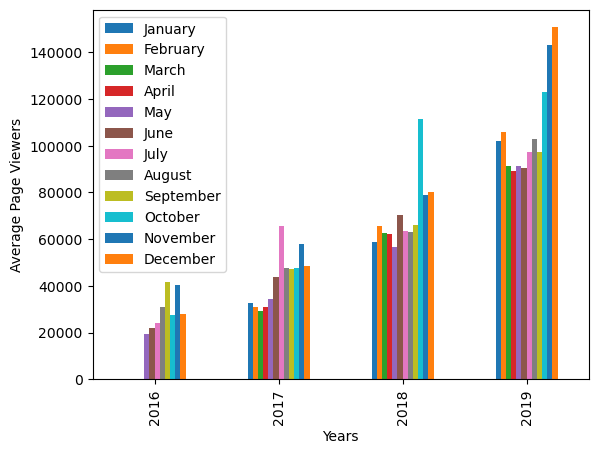

In [84]:
pb = df_gu.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Average Page Viewers')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

## 5. Create a double box plot

In the last part of this project we're going to use Seaborn to create a box plot with 2 subplots. The first one will show us the value distribution across years; the second across months.

In [97]:
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In order to keep the code simple, we are going to create a copy of the DataFrame, especifically for this boxplot, in which we'll have 2 extra columns: one for the year, another one for the month (info taken from the index).

In [100]:
df_box = df_clean.copy()

In [103]:
df_box['year'] = df_clean.index.year
df_box.head()

,value,year
date,,
2016-05-19,19736,2016
2016-05-26,18060,2016
2016-05-27,19997,2016
2016-05-28,19044,2016
2016-05-29,20325,2016


In [106]:
df_box['month'] = df_clean.index.strftime('%b')
df_box.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


Text(0, 0.5, 'Page Views')

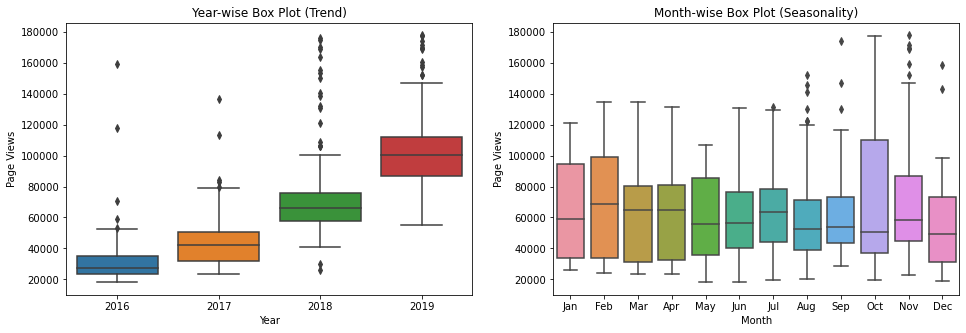

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
sns.boxplot(x='month', y='value', data=df_box, ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_title('Year-wise Box Plot (Trend)')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax1.set_xlabel('Year')
ax2.set_xlabel('Month')
ax1.set_ylabel('Page Views')
ax2.set_ylabel('Page Views')